In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from carla.data.catalog import OnlineCatalog

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


[INFO] Using Python-MIP package version 1.12.0 [model.py <module>]


In [2]:
data_name = "adult"
dataset = OnlineCatalog(data_name)

In [3]:
nn_cfs = pd.read_csv("CCHVAE_adult_ann_cfs", index_col=0)
nn_factuals = pd.read_csv("CCHVAE_adult_ann_factual", index_col=0)

In [4]:
cont_cols = dataset.continuous
cat_cols = list(set(nn_cfs.columns) - set(dataset.continuous) - set(dataset.target))

In [5]:
diff = nn_cfs - nn_factuals
display(diff)

,age,capital-gain,capital-loss,education-num,fnlwgt,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.032483,0.012179,0.036401,-0.089999,0.176136,...,1.0,0.0,-1.0,0.0,1.0
2,0.046274,0.029988,0.036997,0.176607,0.084848,...,0.0,0.0,-1.0,0.0,0.0
3,-0.159395,0.032318,0.035562,0.283987,0.040634,...,0.0,1.0,0.0,0.0,0.0
6,-0.104397,0.035323,0.035981,0.423688,0.095886,...,0.0,1.0,-1.0,1.0,0.0
7,-0.141926,0.029681,0.034726,0.158970,0.062052,...,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
124,0.307682,0.033418,0.036349,0.096864,0.010979,...,0.0,1.0,-1.0,0.0,0.0
126,0.302042,0.026214,-0.359655,0.113992,0.166830,...,1.0,0.0,-1.0,1.0,0.0
128,0.083292,0.037150,0.037160,0.157643,0.126969,...,1.0,0.0,0.0,0.0,0.0
129,0.037018,0.028475,0.035728,0.098668,-0.025440,...,0.0,0.0,-1.0,0.0,0.0


Text(0, 0.5, 'feature')

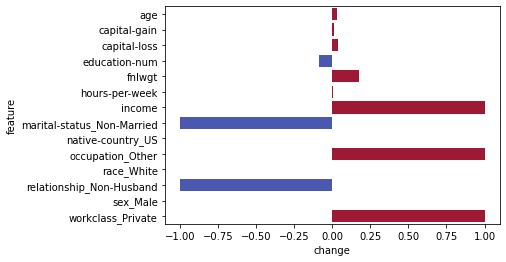

In [6]:
import matplotlib

y = diff.iloc[0]
cmap = matplotlib.cm.get_cmap('coolwarm')
colors = [cmap(0.0) if y[i] < 0 else cmap(1.0) for i in range(len(y))]


ax = sns.barplot(x=y.values, y=y.index, palette=colors)
ax.set_xlabel("change")
ax.set_ylabel("feature")

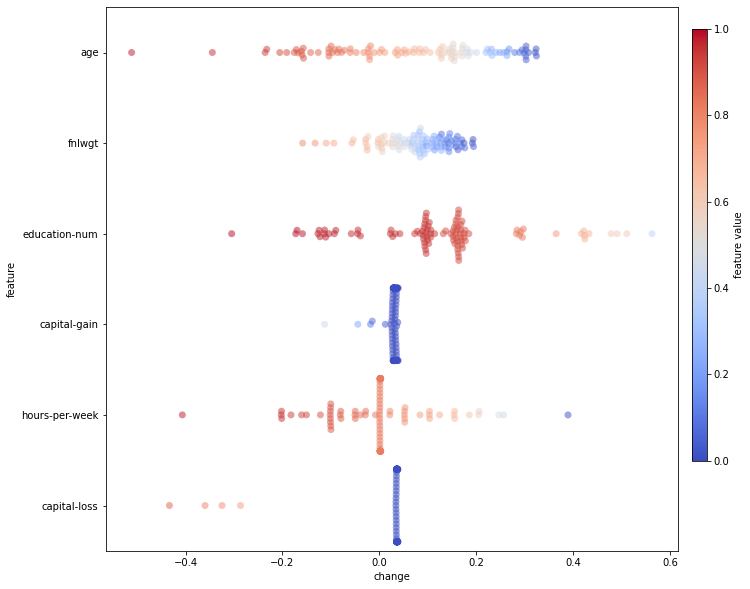

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.swarmplot(x="value",
                   y="variable",
                   data=diff[cont_cols].melt(),
                   hue=nn_factuals[cont_cols].melt()["value"],
                   alpha=0.5,
                   size=7,
                   palette="coolwarm")
ax.set_xlabel("change")
ax.set_ylabel("feature")

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=0.0, vmax=1.0, cmap="coolwarm")

# Make space for the colorbar
ax.figure.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = ax.figure.add_axes([.94, .25, .02, .6])


# Remove legend and add colorbar
ax.get_legend().remove()
ax.figure.colorbar(points, cax=cax, label="feature value")

# Resize to create overlap
fig.set_size_inches(10, 10)
plt.show()

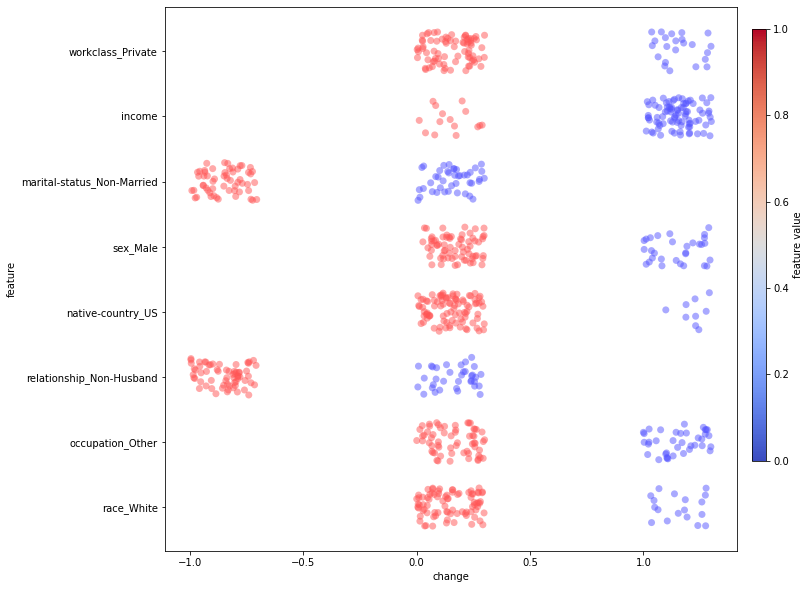

In [8]:
jitter = 0.3

delta = np.random.uniform(-jitter/2, jitter/2, len(diff[cat_cols].melt()["value"]))

fig, ax = plt.subplots(figsize=(10, 10))

# ax = sns.violinplot(x="value", y="variable", data=diff[cat_cols].melt(), color="white", inner=None)
ax = sns.stripplot(x=diff[cat_cols].melt()["value"] + delta,
                   y=diff[cat_cols].melt()["variable"],
                   hue=nn_factuals[cat_cols].melt()["value"],
                   palette="seismic",
                   jitter=jitter,
                   alpha=0.5,
                   s=7)

ax.set_xlabel("change")
ax.set_ylabel("feature")

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=0.0, vmax=1.0, cmap="coolwarm")

# Make space for the colorbar
ax.figure.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = ax.figure.add_axes([.94, .25, .02, .6])

ax.get_legend().remove()
ax.figure.colorbar(points, cax=cax, label="feature value")
plt.show()

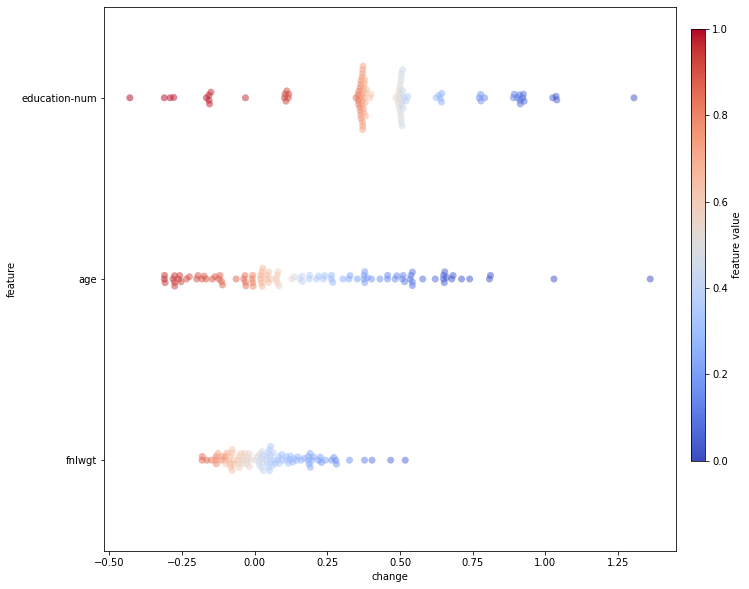

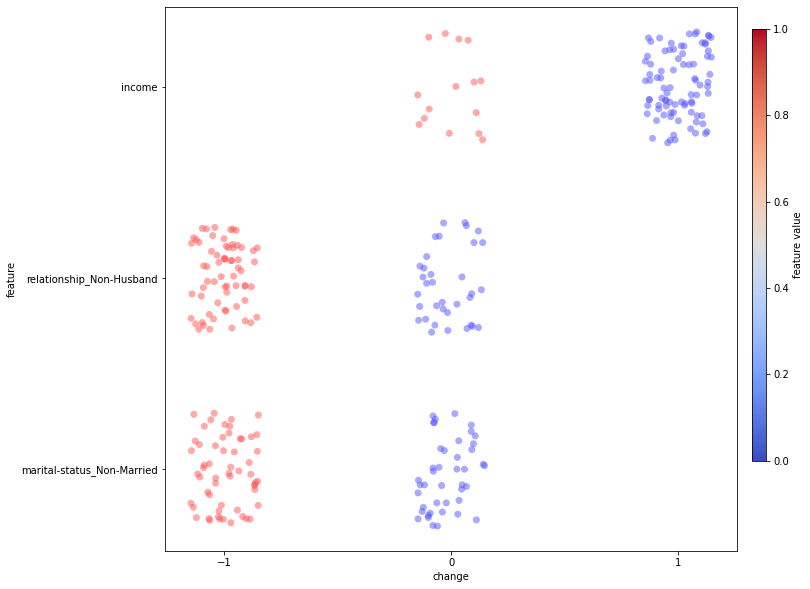